
# Task 2

## Predictive modeling of customer bookings




In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read the dataset
dataset_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQOhRmppTC33gjcOUFKybBP9U5pVW9272PIePPk8EckM-GlDofouPBk1K8BhqKmXm2CozzBF0Uhl3BJ/pub?gid=1403017003&single=true&output=csv"
df = pd.read_csv(dataset_url, encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


####The task poses some questions about this dataset:

**1. Does a customer successfully complete a booking or not?**

**2. What are the most important features that help to define the outcome of the booking result?**

## Dataset Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
#Check data properties
print(f'length of data:  {len(df)}')
print("--------------------------------")
print(f'Data Shape:  {df.shape}')
print("--------------------------------")
print(f'length of column:  {len(df.columns)}')
print("--------------------------------")
print(f'Names of columns: {df.columns}')

length of data:  50000
--------------------------------
Data Shape:  (50000, 14)
--------------------------------
length of column:  14
--------------------------------
Names of columns: Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


Carrying out data conversion on the flight_day column

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
# Map weedays to week numbers
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [8]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [9]:
#Check data statistics
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000




## Data Cleaning

In [10]:
#Check fr missing values
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

- It appears that there are no null values occurred in the dataset.

In [11]:
# check for duplicates and remove it
print("Before removing duplicates:", df.duplicated().sum())

df = df[~df.duplicated()]

print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 719
After removing duplicates: 0


In [12]:
df.shape

(49281, 14)

- There are 719 duplicate rows in this dataset. They have been removed to make the data more realistic and free-error.

In [13]:
#Make a copy of the dataset for EDA
df_copy = df.copy()


## Data Exploration and Analysis

In [14]:
df_copy.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object



*   Checking value counts for some selected columns




In [15]:
df_copy.sales_channel.value_counts()

Internet    43917
Mobile       5364
Name: sales_channel, dtype: int64

In [16]:
df_copy.trip_type.value_counts()

RoundTrip     48779
OneWay          386
CircleTrip      116
Name: trip_type, dtype: int64

In [17]:
df_copy.route.value_counts()

AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [18]:
df_copy.booking_origin.value_counts()

Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [19]:
df_copy.booking_complete.value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

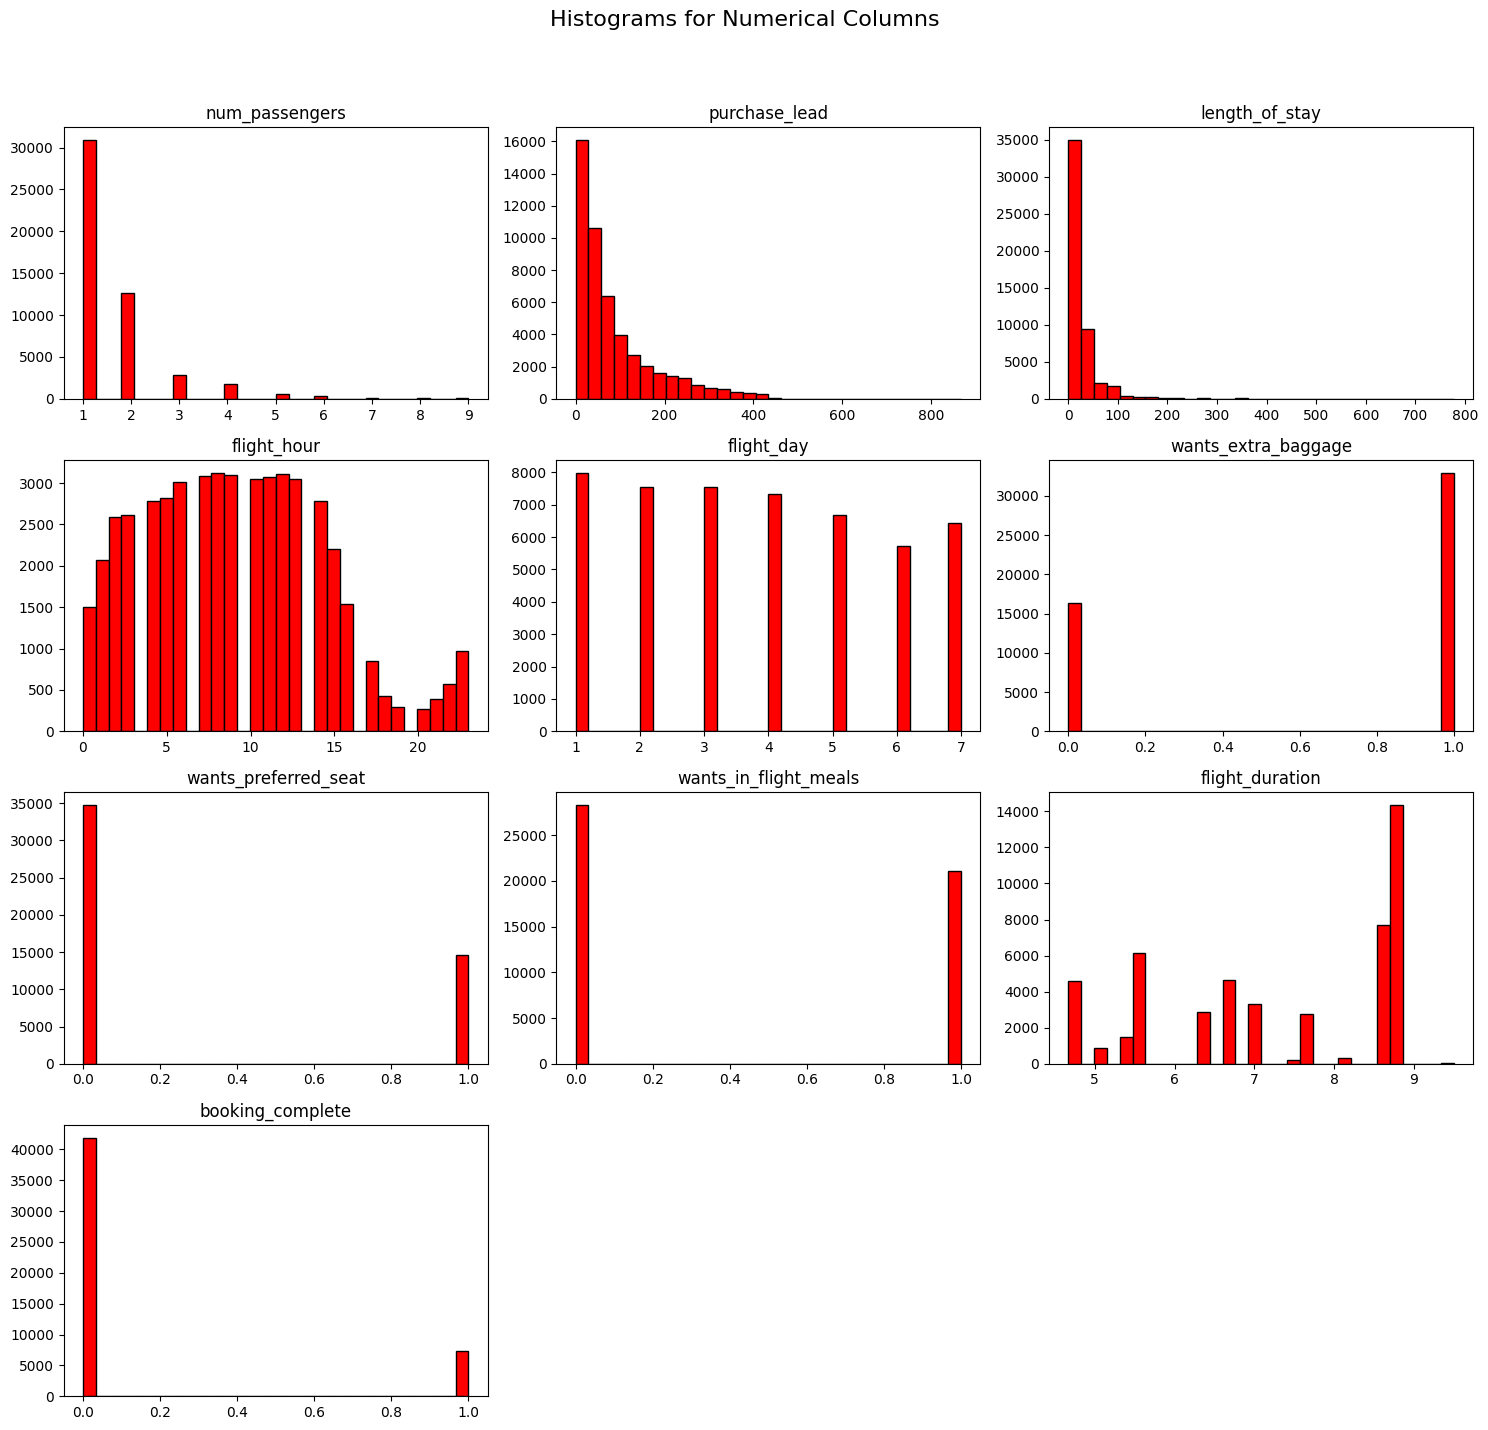

In [20]:
#plot of all numerical columns

df_copy.hist(bins=30, figsize=(15, 15), color='r', edgecolor='black', grid=False)
plt.suptitle("Histograms for Numerical Columns", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [21]:
# Check for percentage of customers that completed booking
total = df_copy.shape[0]
completed_booking        = df_copy[df_copy['booking_complete'] == 1].shape[0]
no_booking               = df_copy[df_copy['booking_complete'] == 0].shape[0]
completed_booking_percentage =  round((completed_booking / total) * 100,2)

# Print the results
print(f"Total number of records: {total}")
print(f"Custoemrs who completed booking: {completed_booking}")
print(f"customers who did not complete booking: {no_booking}")
print(f"Percentage of customers that completed their bookings: {completed_booking_percentage}%")

Total number of records: 49281
Custoemrs who completed booking: 7391
customers who did not complete booking: 41890
Percentage of customers that completed their bookings: 15.0%


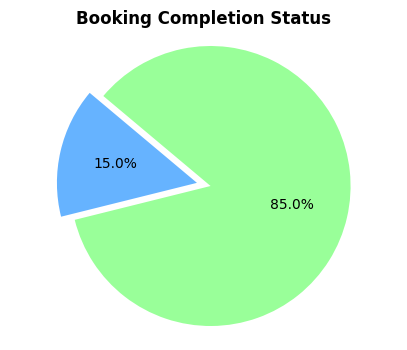

In [22]:
# Ploting the booking_complete column on a pie chart
total = df_copy.shape[0]
completed_booking = df_copy[df_copy['booking_complete'] == 1].shape[0]
no_booking = df_copy[df_copy['booking_complete'] == 0].shape[0]
completed_booking_percentage = round((completed_booking / total) * 100, 2)

#labels = ['Completed Booking', 'No Booking']
sizes = [completed_booking, no_booking]
colors = ['#66b3ff', '#99ff99']
explode = (0.1, 0)

# Plotting the pie chart with a slightly reduced size
plt.figure(figsize=(5, 4))
plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Booking Completion Status', weight='bold')
plt.show()

<Axes: >

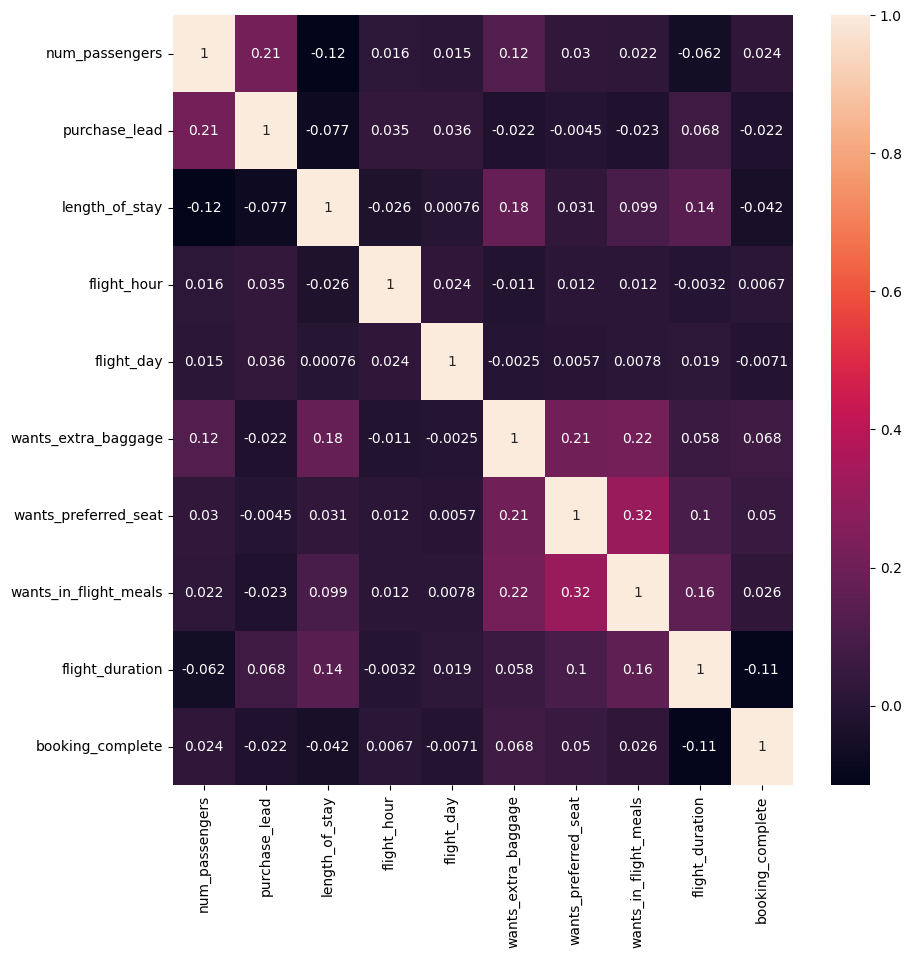

In [23]:
# Correlation plot for all numeric columns
correlations = df_copy.corr(numeric_only= True)
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, annot = True)

In [24]:
#Getting a lsit of the categorical columns
df_copy.select_dtypes(include=['object']).columns.tolist()

['sales_channel', 'trip_type', 'route', 'booking_origin']

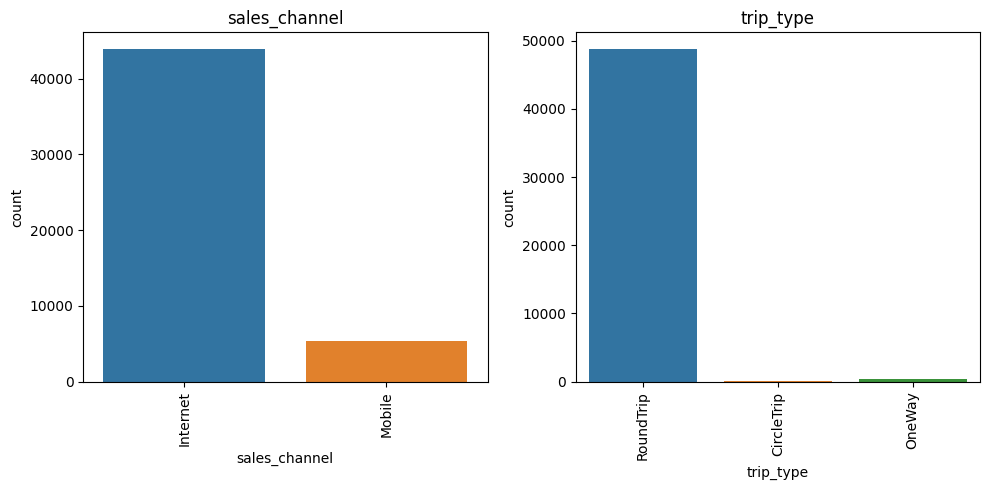

In [25]:
# Explore categorical columns
# Visualizing 'sales_channel' and 'trip_type' column.
cols = ['sales_channel', 'trip_type']
fig, axs = plt.subplots(ncols=len(cols), figsize=(10, 5))
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df_copy,ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

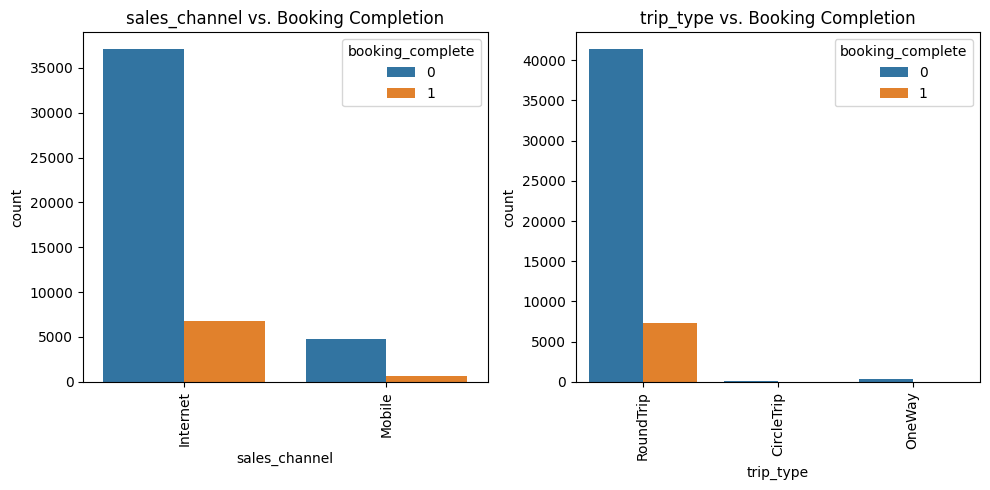

In [26]:
# Explore the impact of categorical columns on booking completion
# Visualizing 'sales_channel' and 'trip_type' against the booking completion status.

cols = ['sales_channel', 'trip_type']
fig, axs = plt.subplots(ncols=len(cols), figsize=(10, 5))

for i, col in enumerate(cols):
    sns.countplot(x=col, hue='booking_complete', data=df_copy, ax=axs[i])
    axs[i].set_title(f'{col} vs. Booking Completion')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


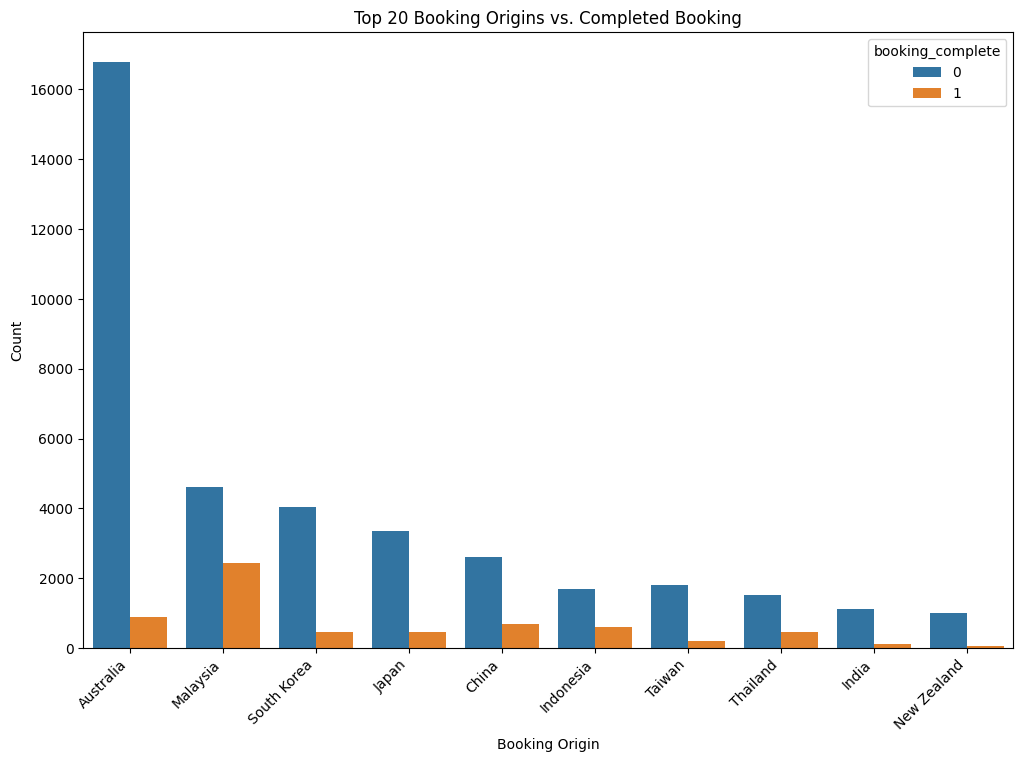

In [27]:
# Explore the relationship between the top 10 booking origins and booking completion

plt.figure(figsize=(12, 8))
top_booking_origins = df_copy['booking_origin'].value_counts().head(10).index

sns.countplot(x='booking_origin', hue='booking_complete', data=df_copy, order=top_booking_origins)
plt.title('Top 20 Booking Origins vs. Completed Booking')
plt.xlabel('Booking Origin')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.show()

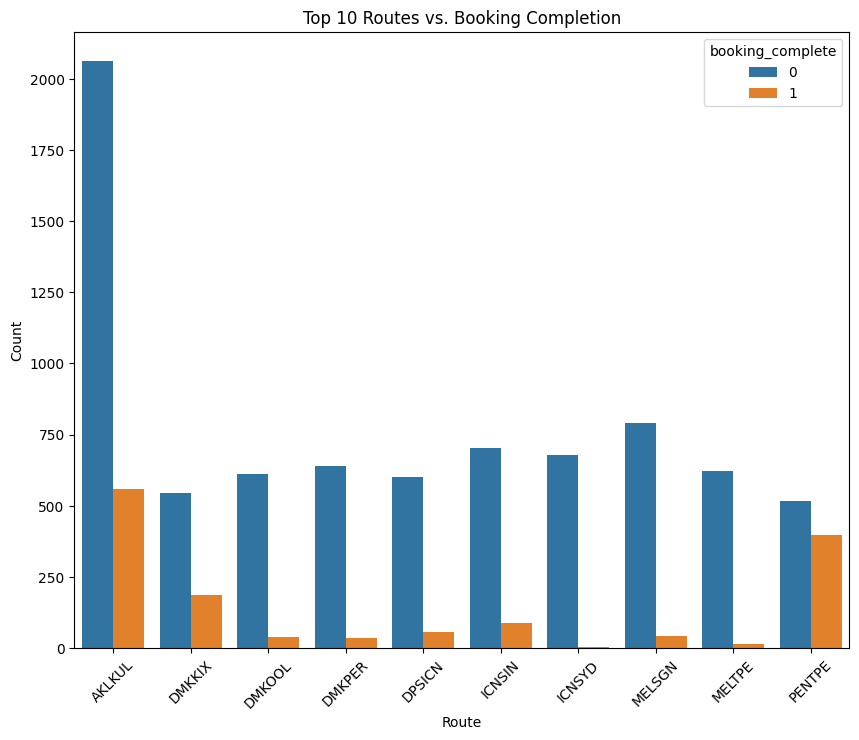

In [28]:
# Explore the relationship between the top 10 Routes and booking completion

plt.figure(figsize=(10, 8))
top_routes = df_copy['route'].value_counts().head(10).index
sns.countplot(x='route', hue='booking_complete', data=df_copy[df_copy['route'].isin(top_routes)])
plt.title('Top 10 Routes vs. Booking Completion')
plt.xlabel('Route')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

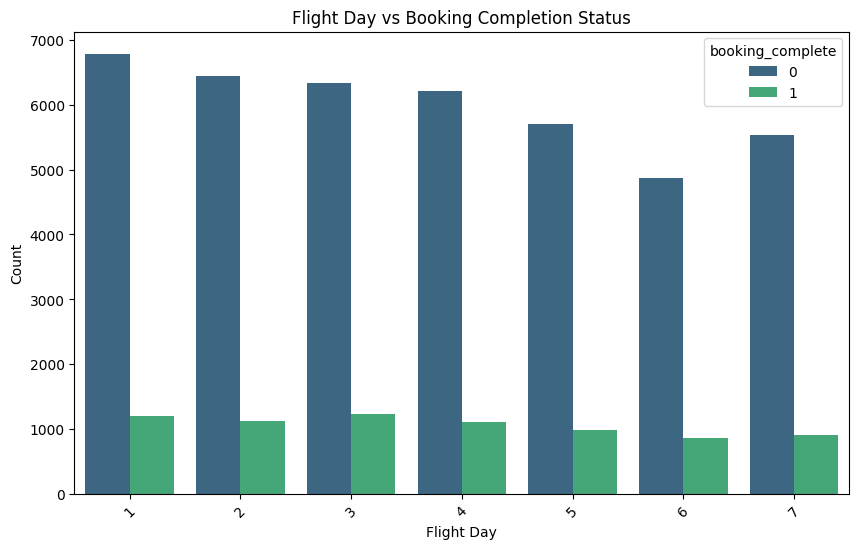

In [29]:
# Explore the relationship between the flight day and booking completion

plt.figure(figsize=(10, 6))

sns.countplot(x='flight_day', hue='booking_complete', data=df_copy, palette='viridis')

plt.xlabel('Flight Day')
plt.ylabel('Count')
plt.title('Flight Day vs Booking Completion Status')

plt.xticks(rotation=45)
plt.show()

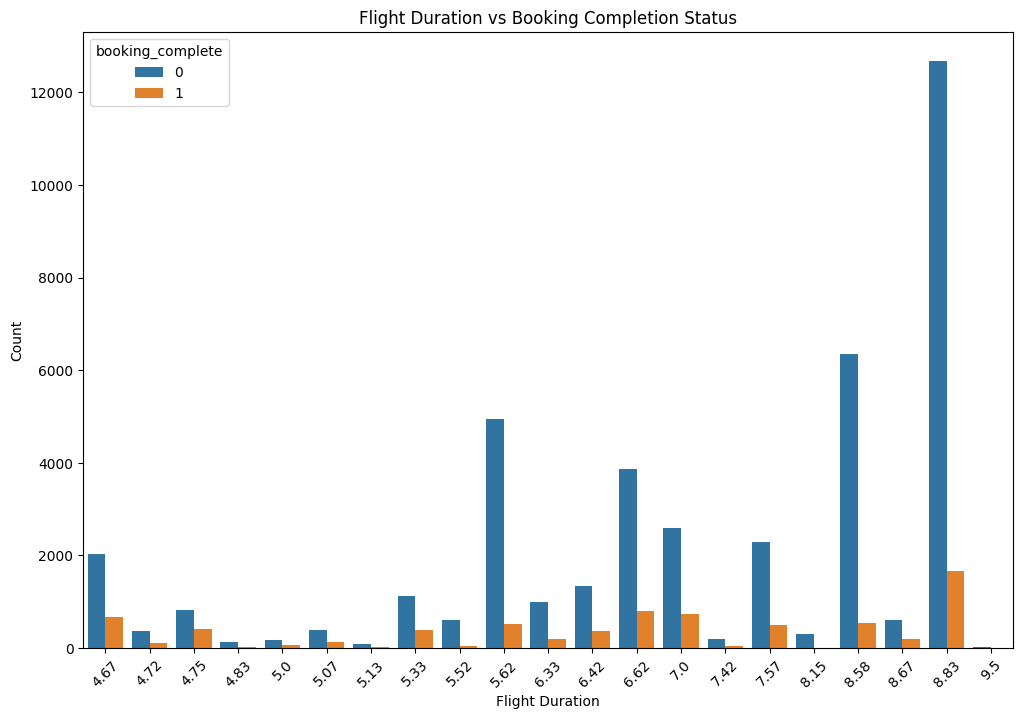

In [30]:
# Explore the relationship between the flight duration and booking completion

plt.figure(figsize=(12, 8))
sns.countplot(x='flight_duration', hue='booking_complete', data=df_copy)

plt.xlabel('Flight Duration')
plt.ylabel('Count')
plt.title('Flight Duration vs Booking Completion Status')
plt.xticks(rotation=45)
plt.show()

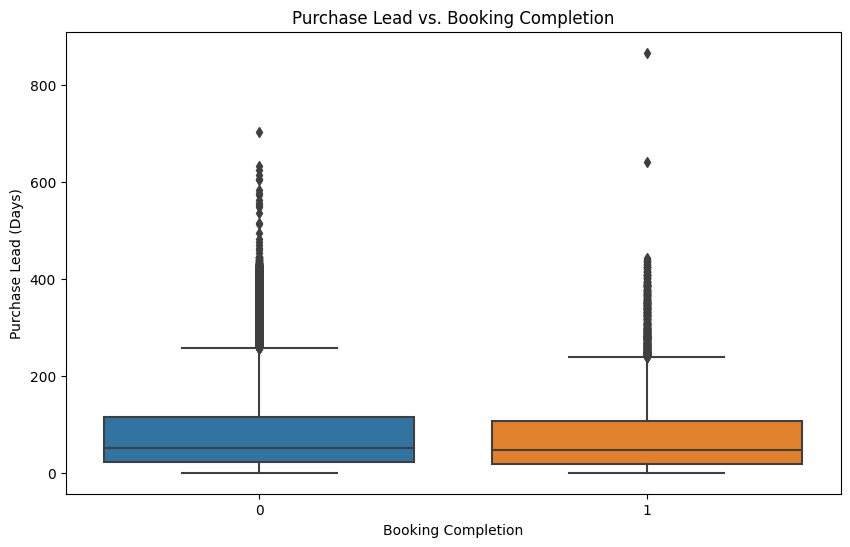

In [31]:
# Boxplot comparing the distribution of purchase lead days between completed and non-completed bookings.

plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_complete', y='purchase_lead', data=df_copy)
plt.title('Purchase Lead vs. Booking Completion')
plt.xlabel('Booking Completion')
plt.ylabel('Purchase Lead (Days)')

plt.show()

## Outlier Removal and Detection

In [32]:
# Define numerical features
numerical_df_copy = df_copy.select_dtypes(include=['int64', 'float64']).columns

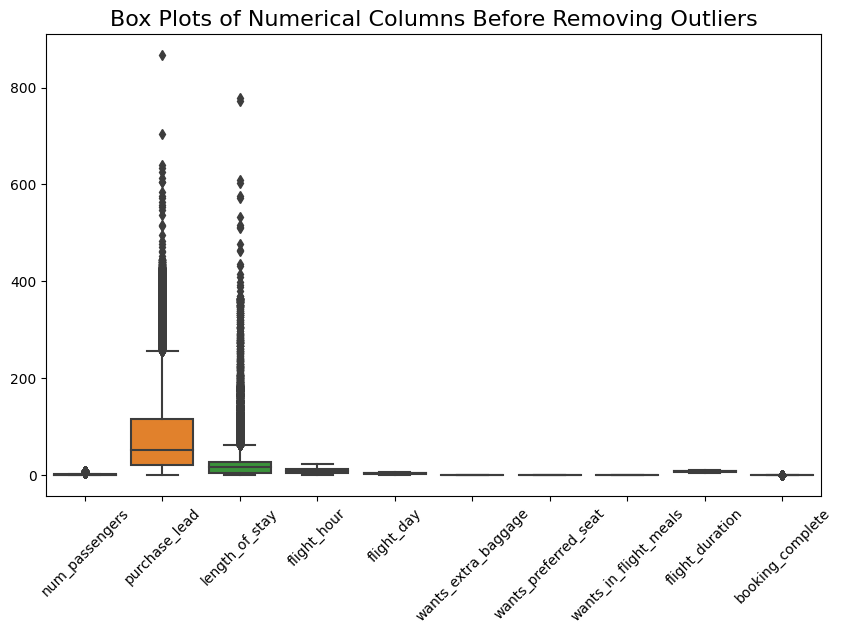

In [33]:
# box plots of numerical columns before removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy[numerical_df_copy])
plt.title("Box Plots of Numerical Columns Before Removing Outliers", fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [34]:
# Function to replace outliers with median using IQR
def replace_outliers_with_median(dataframe, columns, multiplier=1.5):
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR


        # Replace outliers with the median
        dataframe[column] = dataframe[column].apply(lambda x: dataframe[column].median() if x < lower_bound or x > upper_bound else x)
    return dataframe

df_copy_replaced_outliers = replace_outliers_with_median(df_copy.copy(), numerical_df_copy)
df_copy_replaced_outliers.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2.0,Internet,RoundTrip,51.0,19.0,7,6,AKLDEL,New Zealand,1,0,0,5.52,0.0
1,1.0,Internet,RoundTrip,112.0,20.0,3,6,AKLDEL,New Zealand,0,0,0,5.52,0.0
2,2.0,Internet,RoundTrip,243.0,22.0,17,3,AKLDEL,India,1,1,0,5.52,0.0
3,1.0,Internet,RoundTrip,96.0,31.0,4,6,AKLDEL,New Zealand,0,0,1,5.52,0.0
4,2.0,Internet,RoundTrip,68.0,22.0,15,3,AKLDEL,India,1,0,1,5.52,0.0


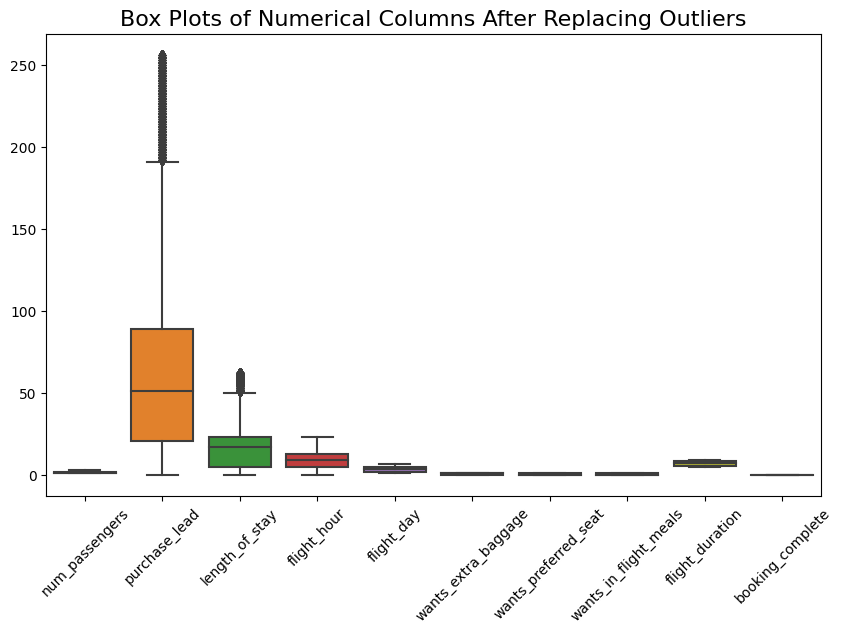

In [35]:
# Box plots of numerical columns after replacing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy_replaced_outliers[numerical_df_copy])
plt.title("Box Plots of Numerical Columns After Replacing Outliers", fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [36]:
# Print the shape before and after replacing outliers
print("Original shape:", df_copy.shape)
print("Shape after replacing outliers:", df_copy_replaced_outliers.shape)

Original shape: (49281, 14)
Shape after replacing outliers: (49281, 14)


In [37]:
# Define numerical features
categorical_df_copy = df_copy.select_dtypes(include='object')
categorical_df_copy.head()

,sales_channel,trip_type,route,booking_origin
0,Internet,RoundTrip,AKLDEL,New Zealand
1,Internet,RoundTrip,AKLDEL,New Zealand
2,Internet,RoundTrip,AKLDEL,India
3,Internet,RoundTrip,AKLDEL,New Zealand
4,Internet,RoundTrip,AKLDEL,India


In [38]:
# Convert categorical variables using one-hot encoding
categorical_df_copy = pd.get_dummies(categorical_df_copy)
categorical_df_copy.head()

,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,route_AKLDEL,route_AKLHGH,route_AKLHND,route_AKLICN,route_AKLKIX,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
categorical_df_copy.shape

(49281, 908)

In [40]:
# Concatenate the numerical columns with the one-hot encoded features
numerical_df_copy = df_copy.select_dtypes(include=['int64', 'float64'])

df_copy = pd.concat([categorical_df_copy, numerical_df_copy], axis=1)

df_copy.head()

,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,route_AKLDEL,route_AKLHGH,route_AKLHND,route_AKLICN,route_AKLKIX,...,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,0,0,0,1,1,0,0,0,0,...,2,262,19,7,6,1,0,0,5.52,0
1,1,0,0,0,1,1,0,0,0,0,...,1,112,20,3,6,0,0,0,5.52,0
2,1,0,0,0,1,1,0,0,0,0,...,2,243,22,17,3,1,1,0,5.52,0
3,1,0,0,0,1,1,0,0,0,0,...,1,96,31,4,6,0,0,1,5.52,0
4,1,0,0,0,1,1,0,0,0,0,...,2,68,22,15,3,1,0,1,5.52,0


In [41]:
# Separating features (X) and target variable (y)
X = df_copy.drop('booking_complete', axis=1)
y = df_copy['booking_complete']

print(X.shape)
print(y.shape)

(49281, 917)
(49281,)


In [42]:
# Scale the features using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [43]:
X

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.17598344],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.17598344],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.17598344],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.19668737],
       [1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.19668737],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.19668737]])

In [44]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 49281, dtype: int64

In [45]:
y.value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

#### This is an inbalance dataset

In [46]:
# Import necessary libraries for handling class imbalance and model evaluation
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE for oversampling to address class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train a Random Forest classifier on the resampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[11720   877]
 [ 1619   569]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     12597
           1       0.39      0.26      0.31      2188

    accuracy                           0.83     14785
   macro avg       0.64      0.60      0.61     14785
weighted avg       0.81      0.83      0.82     14785



In [47]:
# Import necessary libraries for handling class imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Apply random oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Apply random undersampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)

# Train a Random Forest classifier on the resampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[11844   753]
 [ 1630   558]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     12597
           1       0.43      0.26      0.32      2188

    accuracy                           0.84     14785
   macro avg       0.65      0.60      0.61     14785
weighted avg       0.81      0.84      0.82     14785



In [48]:
# Import necessary libraries model evaluation
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model on the resampled data using smote
lr_model = LogisticRegression(random_state=42,max_iter=1000)
lr_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Confusion Matrix:
 [[8998 3599]
 [ 614 1574]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.71      0.81     12597
           1       0.30      0.72      0.43      2188

    accuracy                           0.72     14785
   macro avg       0.62      0.72      0.62     14785
weighted avg       0.84      0.72      0.75     14785



In [49]:
# Train a Logistic Regression model on the resampled data using random oversampler and undersampler
lr_model = LogisticRegression(random_state=42,max_iter=1000)
lr_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Confusion Matrix:
 [[8901 3696]
 [ 590 1598]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.71      0.81     12597
           1       0.30      0.73      0.43      2188

    accuracy                           0.71     14785
   macro avg       0.62      0.72      0.62     14785
weighted avg       0.84      0.71      0.75     14785



<ipython-input-56-768e69a4eb8a>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


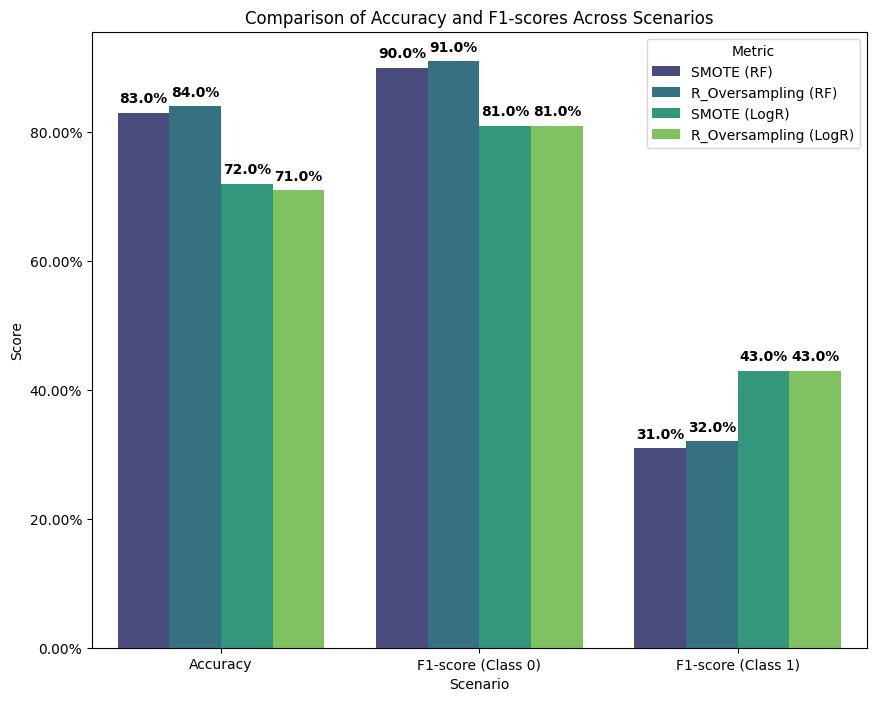

In [56]:
# Create a DataFrame for the predictive modeling results
results = {
    'Scenario': ['Accuracy', 'F1-score (Class 0)', 'F1-score (Class 1)'],
    'SMOTE (RF)': [0.83, 0.90, 0.31],
    'R_Oversampling (RF)': [0.84, 0.91, 0.32],
    'SMOTE (LogR)': [0.72, 0.81, 0.43],
    'R_Oversampling (LogR)': [0.71, 0.81, 0.43],
}

results_df_copy = pd.DataFrame(results)

# Melt the DataFrame for better visualization
results_melted = pd.melt(results_df_copy, id_vars=['Scenario'], var_name='Metric', value_name='Score')

# Plotting with percentages shown on the bars and y-axis ticks
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Scenario', y='Score', hue='Metric', data=results_melted, palette='viridis')

# Convert y-axis ticks to percentages
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])

# Add percentages on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', weight='bold')

plt.title('Comparison of Accuracy and F1-scores Across Scenarios')
plt.legend(title='Metric')
plt.show()

#### Using the original dataset 'df'

In [51]:
# Getting feature_importance
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

# Split the data into features (X) and target variable (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# list of the features and their importance scores
print('\nFeatures Importance:')
feat_imp = pd.DataFrame(zip(X.columns.tolist(), clf.feature_importances_ * 100), columns=['feature', 'importance'])
print(feat_imp)


Features Importance:
                  feature  importance
0          num_passengers    4.992249
1           sales_channel    1.161705
2               trip_type    0.168759
3           purchase_lead   19.301584
4          length_of_stay   12.630720
5             flight_hour   14.264326
6              flight_day    9.191730
7                   route   14.995673
8          booking_origin   10.651172
9     wants_extra_baggage    1.494220
10   wants_preferred_seat    1.703132
11  wants_in_flight_meals    2.235236
12        flight_duration    7.209493


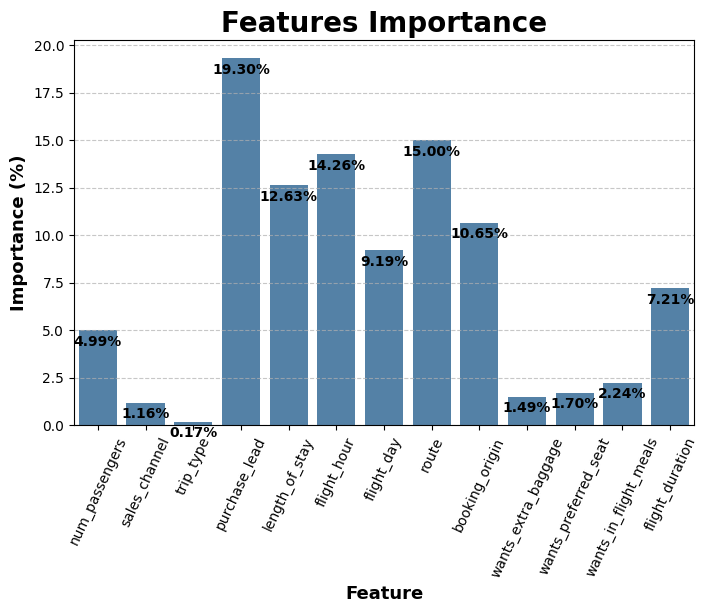

In [60]:
# Features importance plot
plt.figure(figsize=[8, 5])
ax = sns.barplot(data=feat_imp, x='feature', y='importance', color='#4682B4')
plt.title('Features Importance', weight='bold', fontsize=20)
plt.xlabel('Feature', weight='bold', fontsize=13)
plt.ylabel('Importance (%)', weight='bold', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# add annotations
impo = feat_imp['importance']
locs, labels = plt.xticks()
plt.xticks(rotation=65)

for loc, label in zip(locs, labels):
    count = impo[loc]
    pct_string = '{:0.2f}%'.format(count)

    plt.text(loc, count - 0.8, pct_string, ha='center', color='black', weight='bold')